<a href="https://colab.research.google.com/github/gowshik-gs/CAREER-CRAFTER/blob/main/Titanic_Log_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will use Logistic Regression to model the "Pima Indians Diabetes" data set. This model will predict which people are likely to develop diabetes.


This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## Import Libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline
import seaborn as sns

## Load and review data

In [ ]:
pdata = pd.read_csv("Titanic-Dataset.csv")

In [ ]:
pdata.shape # Check number of columns and rows in data frame

(891, 12)

In [ ]:
pdata.head() # To check first 5 rows of data set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
pdata.isnull().values.any() # If there are any null values in data set

True

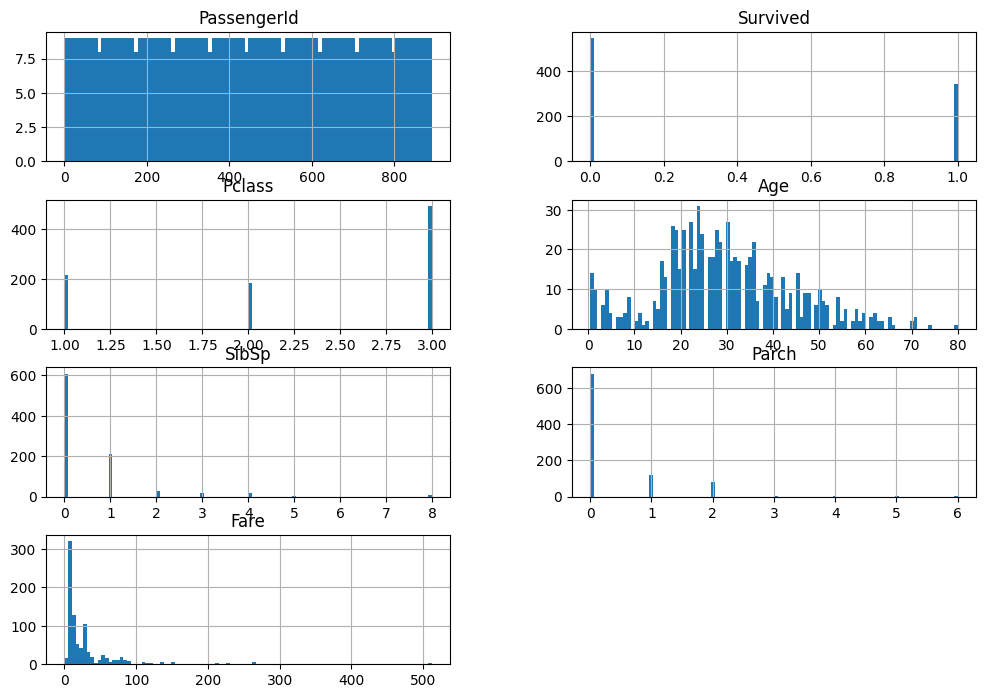

In [ ]:
columns = list(pdata)[0:-1] # Excluding Outcome column which has only
pdata[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2));
# Histogram of first 8 columns

In [ ]:
pdata = pdata.drop('Name',axis=1)

In [ ]:
pdata.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
Cabin,object


In [ ]:
# Convert 'Sex' column to numeric representation.
print(pdata['Sex'].unique())


# Check if the columns exist before trying to drop them
columns_to_drop = ['Ticket', 'Cabin', 'Embarked']
for col in columns_to_drop:
  if col in pdata.columns:
    pdata = pdata.drop(col, axis=1)

['male' 'female']


In [ ]:


# Assuming 'c' is your DataFrame with the 'Sex' column
pdata['Sex'] = pdata['Sex'].map({'male': 0, 'female': 1})


## Identify Correlation in data

In [ ]:
pdata.corr() # It will show correlation matrix

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333
Age,0.036847,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000


In [ ]:
pdata.median()

,0
PassengerId,446.0000
Survived,0.0000
Pclass,3.0000
Sex,0.0000
Age,28.0000
SibSp,0.0000
Parch,0.0000
Fare,14.4542


In [ ]:
# However we want to see correlation in graphical representation so below is function for that
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

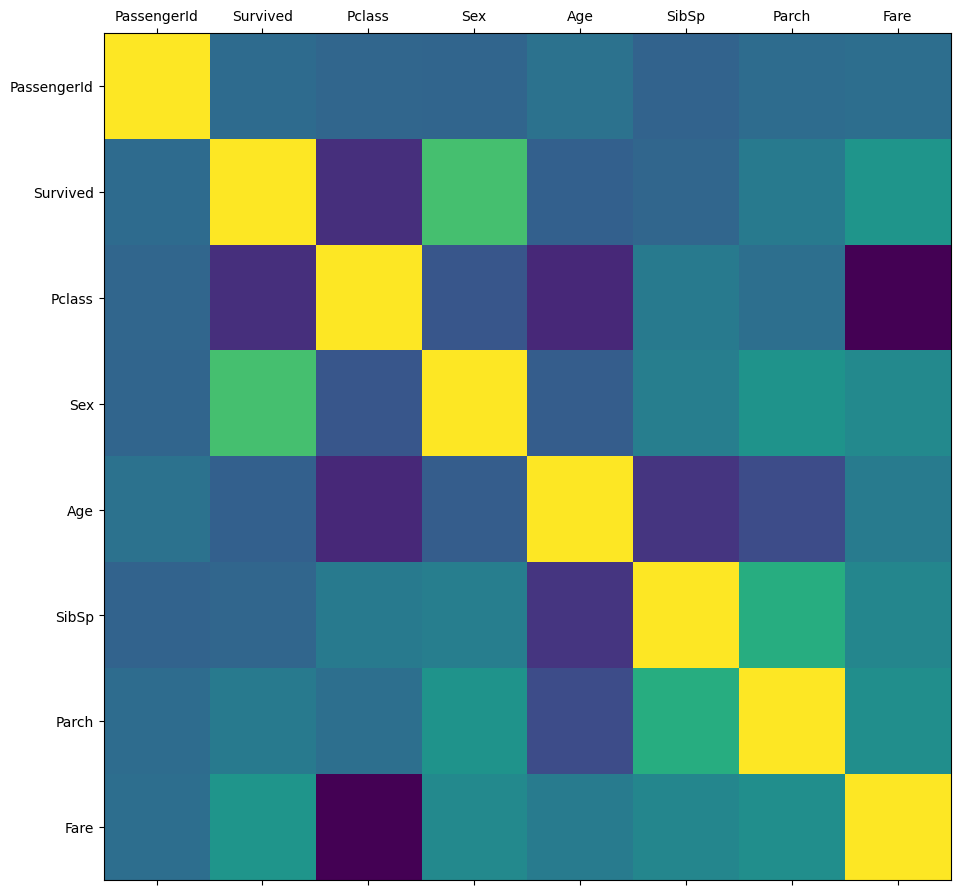

In [ ]:
plot_corr(pdata)

In above plot yellow colour represents maximum correlation and blue colour represents minimum correlation.
We can see none of variable have correlation with any other variables.

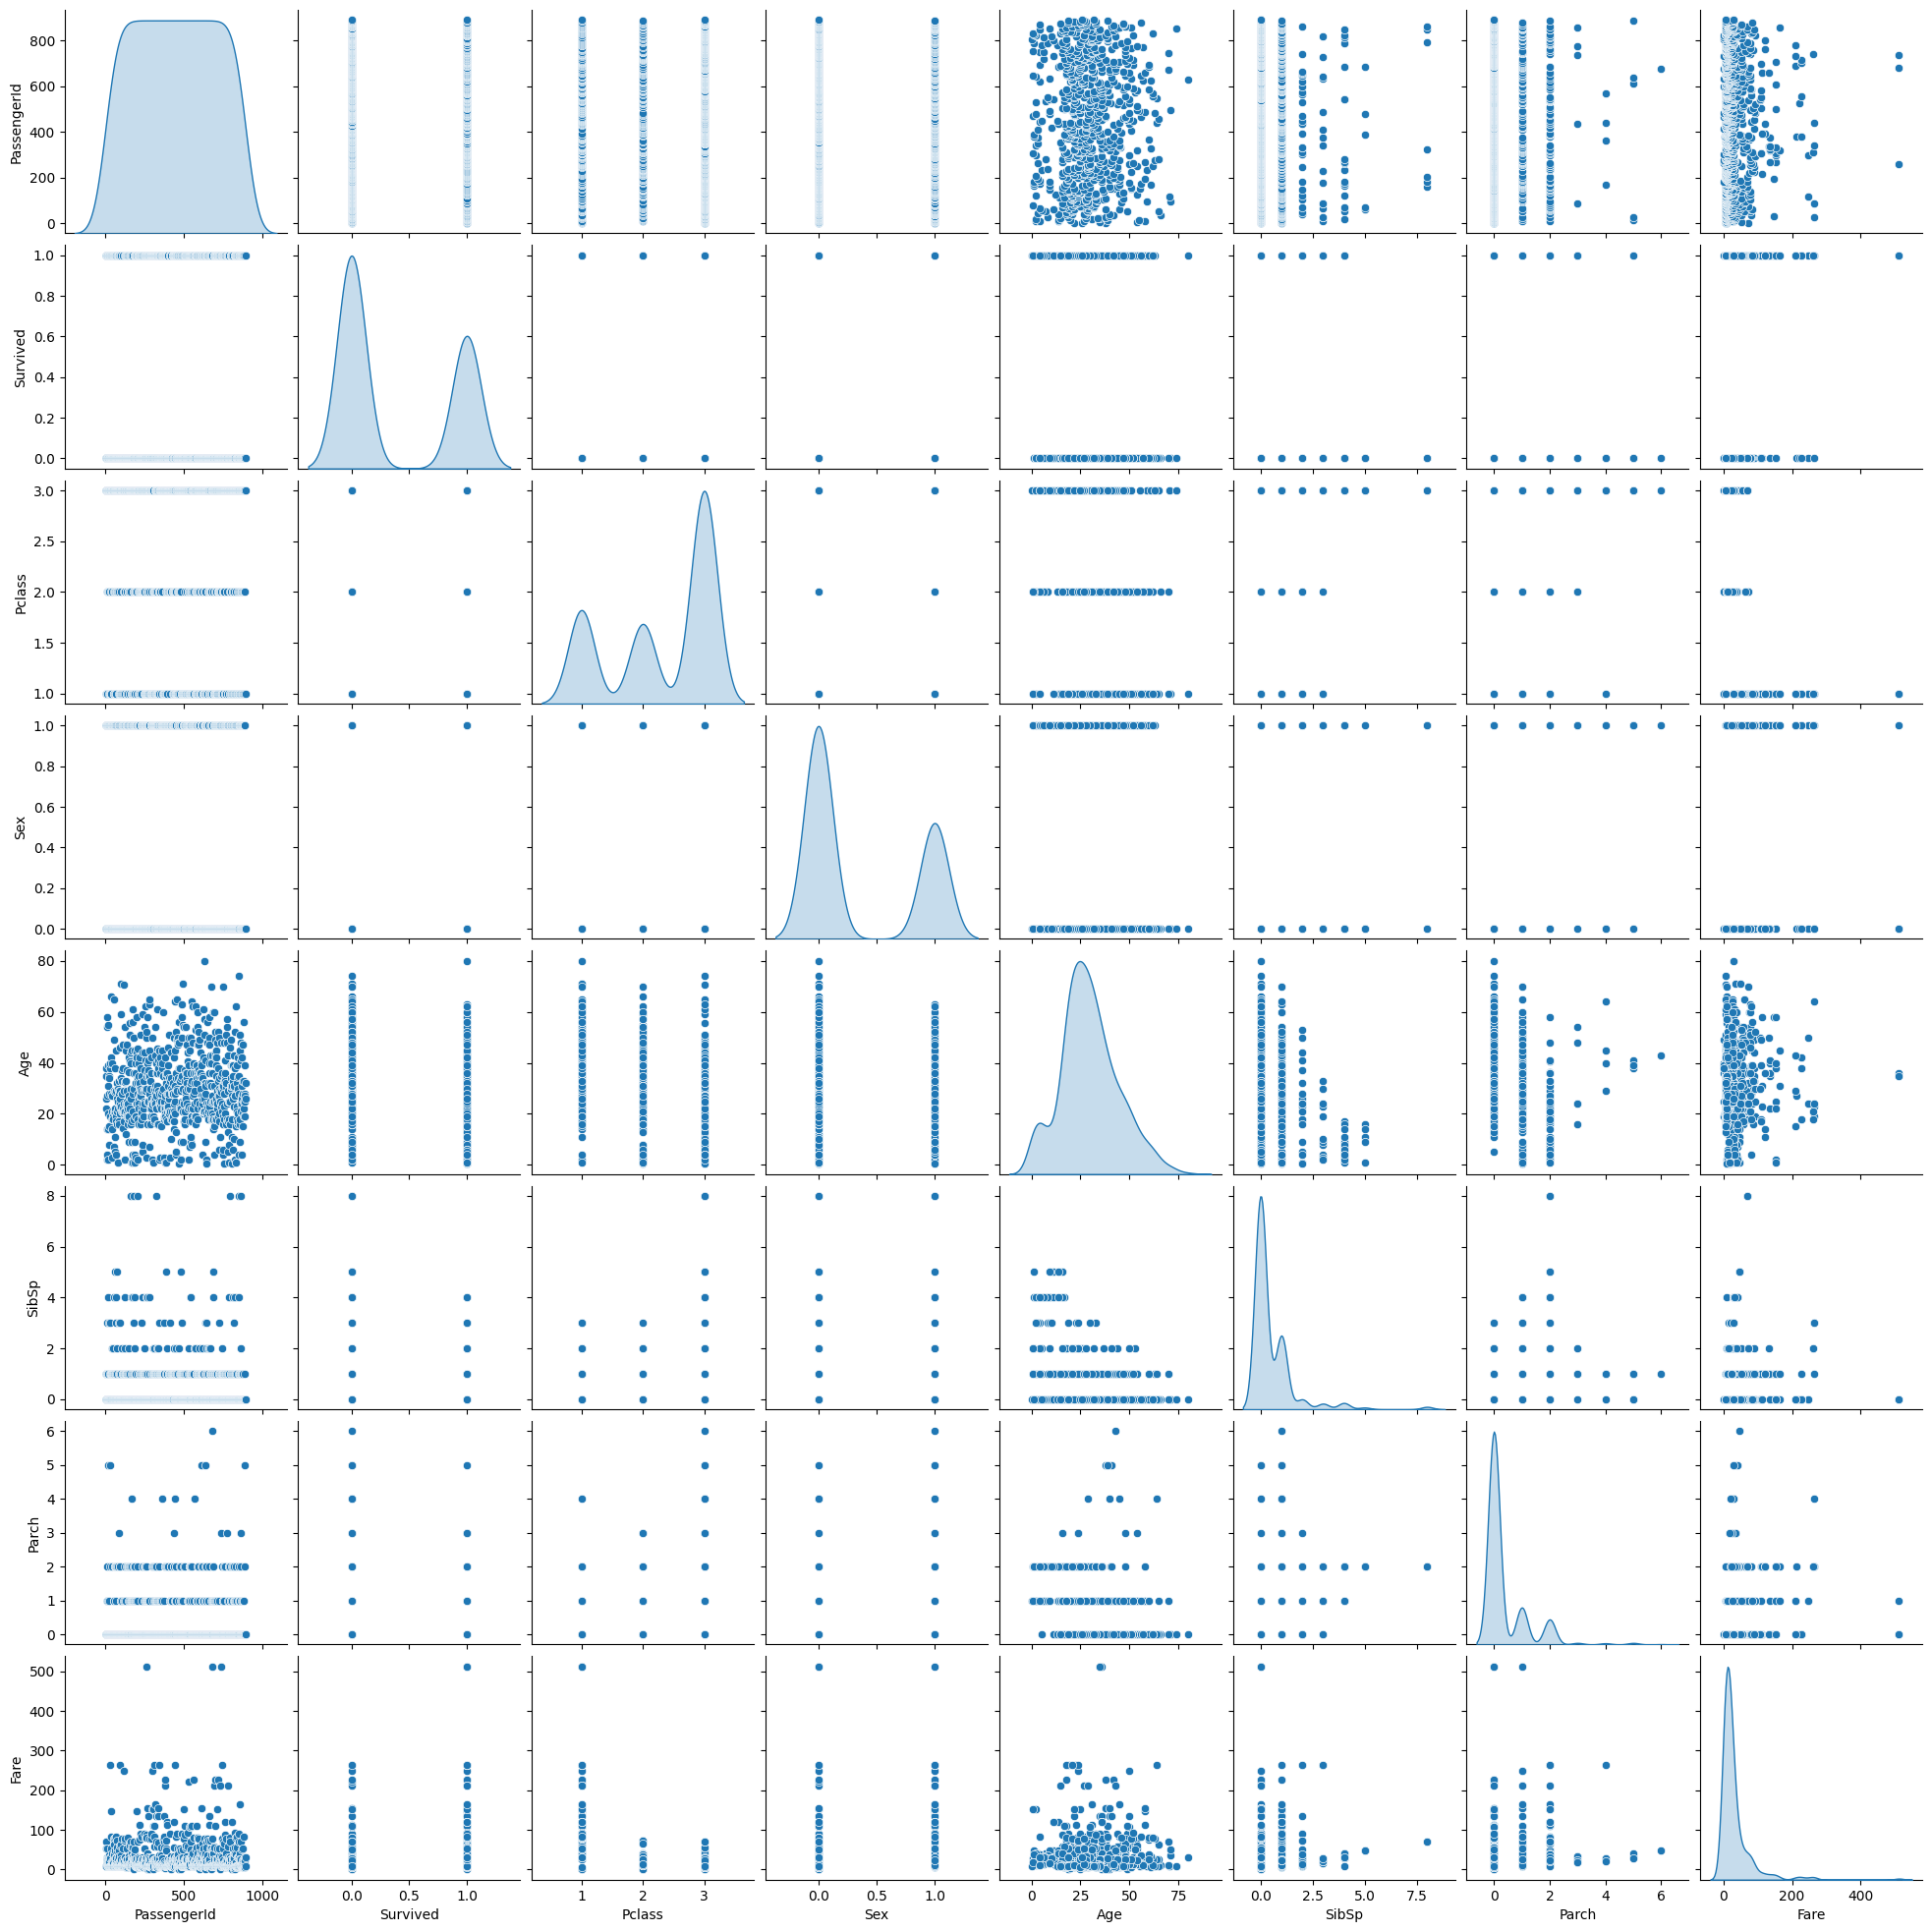

In [ ]:
sns.pairplot(pdata,diag_kind='kde')

## Calculate diabetes ratio of True/False from outcome variable

So we have 34.90% people in current data set who have diabetes and rest of 65.10% doesn't have diabetes.

Its a good distribution True/False cases of diabetes in data.

## Spliting the data
We will use 70% of data for training and 30% for testing.

In [ ]:
from sklearn.model_selection import train_test_split

X = pdata.drop('PassengerId',axis=1)     # Predictor feature columns (8 X m)
Y = pdata['PassengerId']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
# 1 is just any random seed number

x_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
301,1,3,0,NaN,2,0,23.2500
309,1,1,1,30.0,0,0,56.9292
516,1,2,1,34.0,0,0,10.5000
120,0,2,0,21.0,2,0,73.5000
570,1,2,0,62.0,0,0,10.5000


Lets check split of data

In [ ]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(pdata.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(pdata.index)) * 100))

79.91% data is in training set
20.09% data is in test set


# Data Preparation

### Check hidden missing values

As we checked missing values earlier but haven't got any. But there can be lots of entries with 0 values. We must need to take care of those as well.

In [ ]:
x_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
301,1,3,0,NaN,2,0,23.2500
309,1,1,1,30.0,0,0,56.9292
516,1,2,1,34.0,0,0,10.5000
120,0,2,0,21.0,2,0,73.5000
570,1,2,0,62.0,0,0,10.5000


In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 301 to 37
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    int64  
 3   Age       568 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 44.5 KB


We can see lots of 0 entries above.

### Replace 0s with serial mean

In [ ]:
from sklearn.impute import SimpleImputer
rep_0 = SimpleImputer(missing_values=0, strategy="mean") # This imputer will replace 0 with the mean of the respective column
rep_nan = SimpleImputer(missing_values=np.nan, strategy='mean') # This imputer will replace NaN values with the mean

cols=x_train.columns

# First replace NaNs in the dataframes
x_train = pd.DataFrame(rep_nan.fit_transform(x_train))
x_test = pd.DataFrame(rep_nan.fit_transform(x_test))

# Then replace 0s in the dataframes
x_train = pd.DataFrame(rep_0.fit_transform(x_train))
x_test = pd.DataFrame(rep_0.fit_transform(x_test))


x_train.columns = cols
x_test.columns = cols

x_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1.0,3.0,1.0,30.166232,2.000000,1.54386,23.2500
1,1.0,1.0,1.0,30.000000,1.537118,1.54386,56.9292
2,1.0,2.0,1.0,34.000000,1.537118,1.54386,10.5000
3,1.0,2.0,1.0,21.000000,2.000000,1.54386,73.5000
4,1.0,2.0,1.0,62.000000,1.537118,1.54386,10.5000


# Logistic Regression

In [ ]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression()
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

            0         1         2         3         4         5         6  \
0    0.035286  0.131456  0.035286  0.327655  0.001684  0.054953 -0.346324   
1   -0.036255 -0.158218 -0.036255 -0.401788 -0.112124 -0.053337  0.588912   
2    0.001886  0.040227  0.001886  0.439464  0.005602  0.003406 -0.623876   
3    0.012765  0.070490  0.012765  0.391168  0.022337  0.020230 -0.478613   
4    0.051957  0.182184  0.051957 -0.874560  0.212226  0.026020  0.732083   
..        ...       ...       ...       ...       ...       ...       ...   
707  0.027288  0.108938  0.027288  0.365285  0.044088  0.042648 -0.440514   
708  0.018609 -0.005795  0.018609  0.272563  0.033026  0.028603 -0.152980   
709  0.003427  0.075759  0.003427  0.094461 -0.042797  0.048618  0.144890   
710  0.011319 -0.091881  0.011319 -0.110288  0.022732  0.016995  0.370135   
711  0.009129  0.059630  0.009129  0.420106  0.016584  0.014611 -0.570905   

     intercept  
0     0.036240  
1    -0.037337  
2     0.002034  
3     0

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
model_score = model.score(x_test, y_test)
print(model_score)

0.0


In [ ]:
print(y_train.value_counts())


Survived
0    2
1    1
Name: count, dtype: int64


In [ ]:
from sklearn.utils import resample

# Assuming df is your original DataFrame
# Separate majority and minority classes
df_majority = df[df.Survived == 0]
df_minority = df[df.Survived == 1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                   replace=True,     # sample with replacement
                                   n_samples=len(df_majority),    # to match majority class
                                   random_state=42) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Check new class distribution
print(df_upsampled.Survived.value_counts())


Survived
0    2
1    2
Name: count, dtype: int64


Unique values in y_pred: [1]
Shape of confusion matrix: (2, 2)


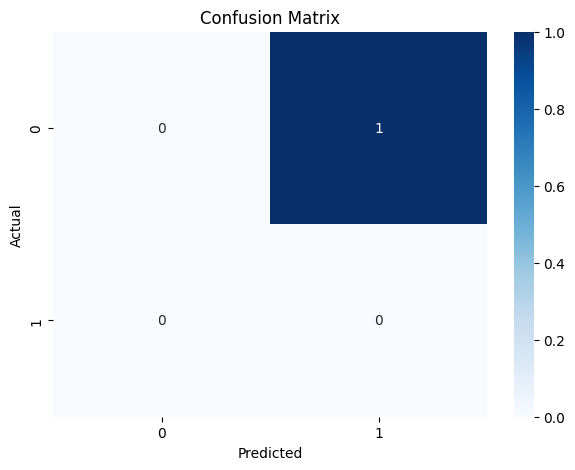

In [ ]:
# Define features and target variable from the upsampled dataset
X = df_upsampled[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = df_upsampled['Survived']

# Split the data again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression model again
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Check unique values in predictions
print("Unique values in y_pred:", np.unique(y_pred))

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])  # Use the labels parameter

# Verify the shape of the confusion matrix
print("Shape of confusion matrix:", cm.shape)

# Create DataFrame for the confusion matrix
df_cm = pd.DataFrame(cm, index=[0, 1], columns=[0, 1])  # Set index and columns as 0 and 1

# Plot the heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



The confusion matrix

True Positives (TP): we correctly predicted that they do have diabetes 48

True Negatives (TN): we correctly predicted that they don't have diabetes 132

False Positives (FP): we incorrectly predicted that they do have diabetes (a "Type I error") 14 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they don't have diabetes (a "Type II error") 37 Falsely predict negative Type II error